In [13]:
#Klein-Model υπόδειγμα με δυοπώλιο
# Δημήτρης Βολιώτης

## Klein-Model υπόδειγμα με συμμετρικό δυοπώλιο

In [14]:
import sympy as sp
from sympy import init_printing # Το init_printing εισάγει το LaTeX printing
init_printing()
import math
from sympy.plotting import plot3d, plot



In [15]:
#Εισαγωγή βασικών και μεταβλητών και παραμέτρων
rD, rL, r = sp.var('rD,rL,r',real=True); #Επιτόκια rD (καταθέσεων), rL (χορηγήσεων), r (παρέμβασης)
D1, D2, L1, L2 = sp.var('D1,D2,L1,L2', real=True); #Καταθέσεις (D) και Χορηγήσεις (L)
q = sp.var('q', real=True); # Παράμετρος υποχρεωτικών ρευστών διαθεσίμων
#Συνολικές Χορηγήσεις
L = L1 + L2;
D = D1 + D2;
# Αντίστροφη συνάρτηση χορηγήσεων
A, a = sp.var('A,a', real=True); #Παράμετροι αντίστροφης συνάρτησης χορηγήσεων
invrL = A-a*L ;
#Αντίστροφη Συνάρτηση καταθέσεων
B,b = sp.var('B,b', real=True); #Παράμετροι αντίστροφης συνάρτησης καταθέσεων
invrD = B +b*D;
#Συνάρτηση κόστους
d,g =sp.var('d,g', real=True); # Παράμετροι συνάρτησης κόστους
cost11 = (0.5*d)*L1**2 + (0.5*g)*D1**2;
cost12 = (0.5*d)*L2**2 + (0.5*g)*D2**2

## Γενική Λύση με Κυρτή συνάρτηση Κόστους

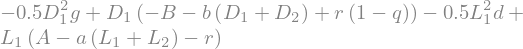

In [16]:
#Συνάρτηση κερδών  τράπεζας b1

profitb1 = (invrL -r)*L1 + ((1-q)*r -invrD)*D1 -cost11
profitb1

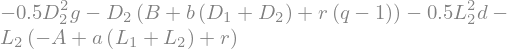

In [17]:
#Συνάρτηση κερδών  τράπεζας b2

profitb2 = (invrL -r)*L2 + ((1-q)*r -invrD)*D2 -cost12
profitb2.simplify()

In [18]:
#Λύση μαθηματικού προγράμματος τράπεζας β1
#Αναγκαίες συνθήκες πρώτης τάξης 
derprofitb1L1 = sp.diff(profitb1,L1) 
derprofitb1D1 = sp.diff(profitb1,D1) 

derprofitb1D1, derprofitb1L1

In [19]:
#Λύση μαθηματικού προγράμματος τράπεζας β2
#Αναγκαίες συνθήκες πρώτης τάξης 
derprofitb2L2 = sp.diff(profitb2,L2) 
derprofitb2D2 = sp.diff(profitb2,D2) 

derprofitb2D2, derprofitb2L2

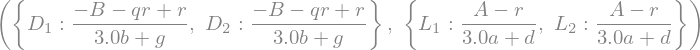

In [20]:
#Λύση συστήματος εξισώσεων από τις ΑΣΠΤ

equilibrium_L = sp.solve((derprofitb1L1, derprofitb2L2), L1, L2)
equilibrium_D = sp.solve((derprofitb1D1, derprofitb2D2), D1, D2)
equilibrium_D, equilibrium_L 
#equilibrium_D[D1], equilibrium_L[L1]

## Άσκηση Υπολογισμού Ισορροπίας

In [26]:
# Υπολογισμός καταθέσεων και χορηγήσεων για τις δύο τράπεζες

eqLoans1 = equilibrium_L[L1].subs([(A,1), (r, 0.1), (a,0.05), (d,0.001)]);
eqDeposits1 = equilibrium_D[D1].subs([(g,0.005), (q,0.05), (B,0), (b,0.05), (r,0.1)]);
eqLoans2 = equilibrium_L[L2].subs([(A,1), (r, 0.1), (a,0.05), (d,0.001)]);
eqDeposits2 = equilibrium_D[D2].subs([(g,0.005), (q,0.05), (B,0), (b,0.05), (r,0.1)]);
eqLoans1, eqDeposits1, eqLoans2, eqDeposits2

### Υπολογισμός Επιτοκίων στην ισορροπία

In [27]:
eqL = eqLoans1 + eqLoans2;
eqD = eqDeposits1 + eqDeposits2;

eq_rL = invrL.subs([(A,1), (a,0.05), (L1, eqLoans1), (L2, eqLoans2)]);
eq_rD = invrD.subs([(B,0), (b,0.05), (D1, eqDeposits1), (D2, eqDeposits2)]);
eq_rL, eq_rD

## Υπολογισμός κερδών στην ισορροπία 

In [23]:
#profitb1 = (invrL -r)*L1 + ((1-q)*r -invrD)*D1 -cost11
eqprofitb1 = profitb1.subs([(L1, eqLoans1), (L2, eqLoans2), (D1, eqDeposits1), (D2, eqDeposits2), (A,0.5), (a,0.085), 
                            (B,0.035), (b,0.5), (g,0.005),  (d,0.001), (r, 0.1), (q,0.05)])
eqprofitb2 = profitb2.subs([(L1, eqLoans1), (L2, eqLoans2), (D1, eqDeposits1), (D2, eqDeposits2), (A,0.5), (a,0.085), 
                            (B,0.035), (b,0.5), (g,0.005),  (d,0.001), (r, 0.1), (q,0.05)])
eqprofitb1, eqprofitb2